In [1]:
%%capture
pip install kaggle

In [2]:
import os
import getpass 
os.environ['KAGGLE_USERNAME'] = "naveengubba"

import sys

os.environ['KAGGLE_KEY'] = getpass.getpass()

 ································


In [3]:
!kaggle datasets download  -d patrickb1912/ipl-complete-dataset-20082020 --path assignment --unzip

 73%|███████████████████████████▊          | 1.00M/1.37M [00:00<00:00, 7.79MB/s]
100%|██████████████████████████████████████| 1.37M/1.37M [00:00<00:00, 8.75MB/s]


In [4]:
#change filenames
import os 
ind = os.listdir(os.getcwd()).index('assignment')

for file in os.listdir((os.getcwd())+'/'+os.listdir(os.getcwd())[ind]):
    if 'Ball' in file:
        os.rename(f"{(os.getcwd())+'/'+os.listdir(os.getcwd())[ind]}/{file}",f"{(os.getcwd())+'/'+os.listdir(os.getcwd())[ind]}/detail.csv")
    if "Match" in file:
        os.rename(f"{(os.getcwd())+'/'+os.listdir(os.getcwd())[ind]}/{file}",f"{(os.getcwd())+'/'+os.listdir(os.getcwd())[ind]}/summary.csv")

for file in os.listdir((os.getcwd())+'/'+os.listdir(os.getcwd())[ind]):
    if 'Ball' in file:
        print("error")
    if "Match" in file:
        print("error") 

In [5]:
#make dataframes
import pandas as pd

for file in os.listdir((os.getcwd())+'/'+os.listdir(os.getcwd())[ind]):
    if 'detail' in file:
        detail = pd.read_csv(f"{(os.getcwd())+'/'+os.listdir(os.getcwd())[ind]}/{file}")
    if "summary" in file:
        summary = pd.read_csv(f"{(os.getcwd())+'/'+os.listdir(os.getcwd())[ind]}/{file}")
                              
# pd.read_csv(f"{(os.getcwd())+'/'+os.listdir(os.getcwd())[ind]}/{os.listdir((os.getcwd())+'/'+os.listdir(os.getcwd())[ind])[1]}")
# pd.read_csv(f"{(os.getcwd())+'/'+os.listdir(os.getcwd())[ind]}/{os.listdir((os.getcwd())+'/'+os.listdir(os.getcwd())[ind])[0]}")


In [6]:
summary['date'] = pd.to_datetime(summary['date']).dt.year
summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    int64  
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

# Exploratory Data Analysis

## Match Level statistics

1. Victory type distribution - Whether victory in a match is skewed towwards winning by wickets or by runs. This is to analyze whether, IPL, as is popularly known to be blitzkreig of making runs, is infact true or not.

2. Team wise Victory distribution - Whether a Team is traditionnaly winning by runs or by wickets?
3. Match results distrubution by Team - Whether a Team is known to win/lose only against certain teams?

## Batting Statistics

1. Strike Rate
2. Runs per Wicket Ratio
3. Net Run Rate

## Bowling Statistics

1. Runs conceded per Wicket
2. Maiden Overs
3. Economy Rate

Text(0.5, 1.0, 'Victory type (by runs/wickets) distribution')

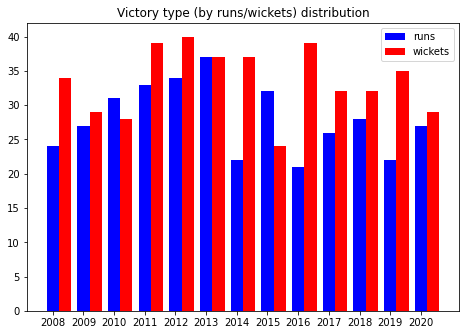

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()

data = summary.loc[:,('date','team1','team2','winner','result')].sort_values(by='date')


w = 0.4
ax = fig.add_axes([0,0,1,1])

win_type = summary.loc[:,('date','result')].groupby(['date','result']).size().reset_index(name='score_type')
runs = win_type[win_type.result=='runs']
wickets = win_type[win_type.result=='wickets']

ax.bar(runs['date'], runs['score_type'],w, color='b')
ax.bar(wickets['date']+0.4, wickets['score_type'], w,color='r')
ax.legend(labels=['runs','wickets'])
ax.set_xticks(data.date.unique())
ax.set_xticklabels(data.date.unique())
ax.set_title('Victory type (by runs/wickets) distribution')

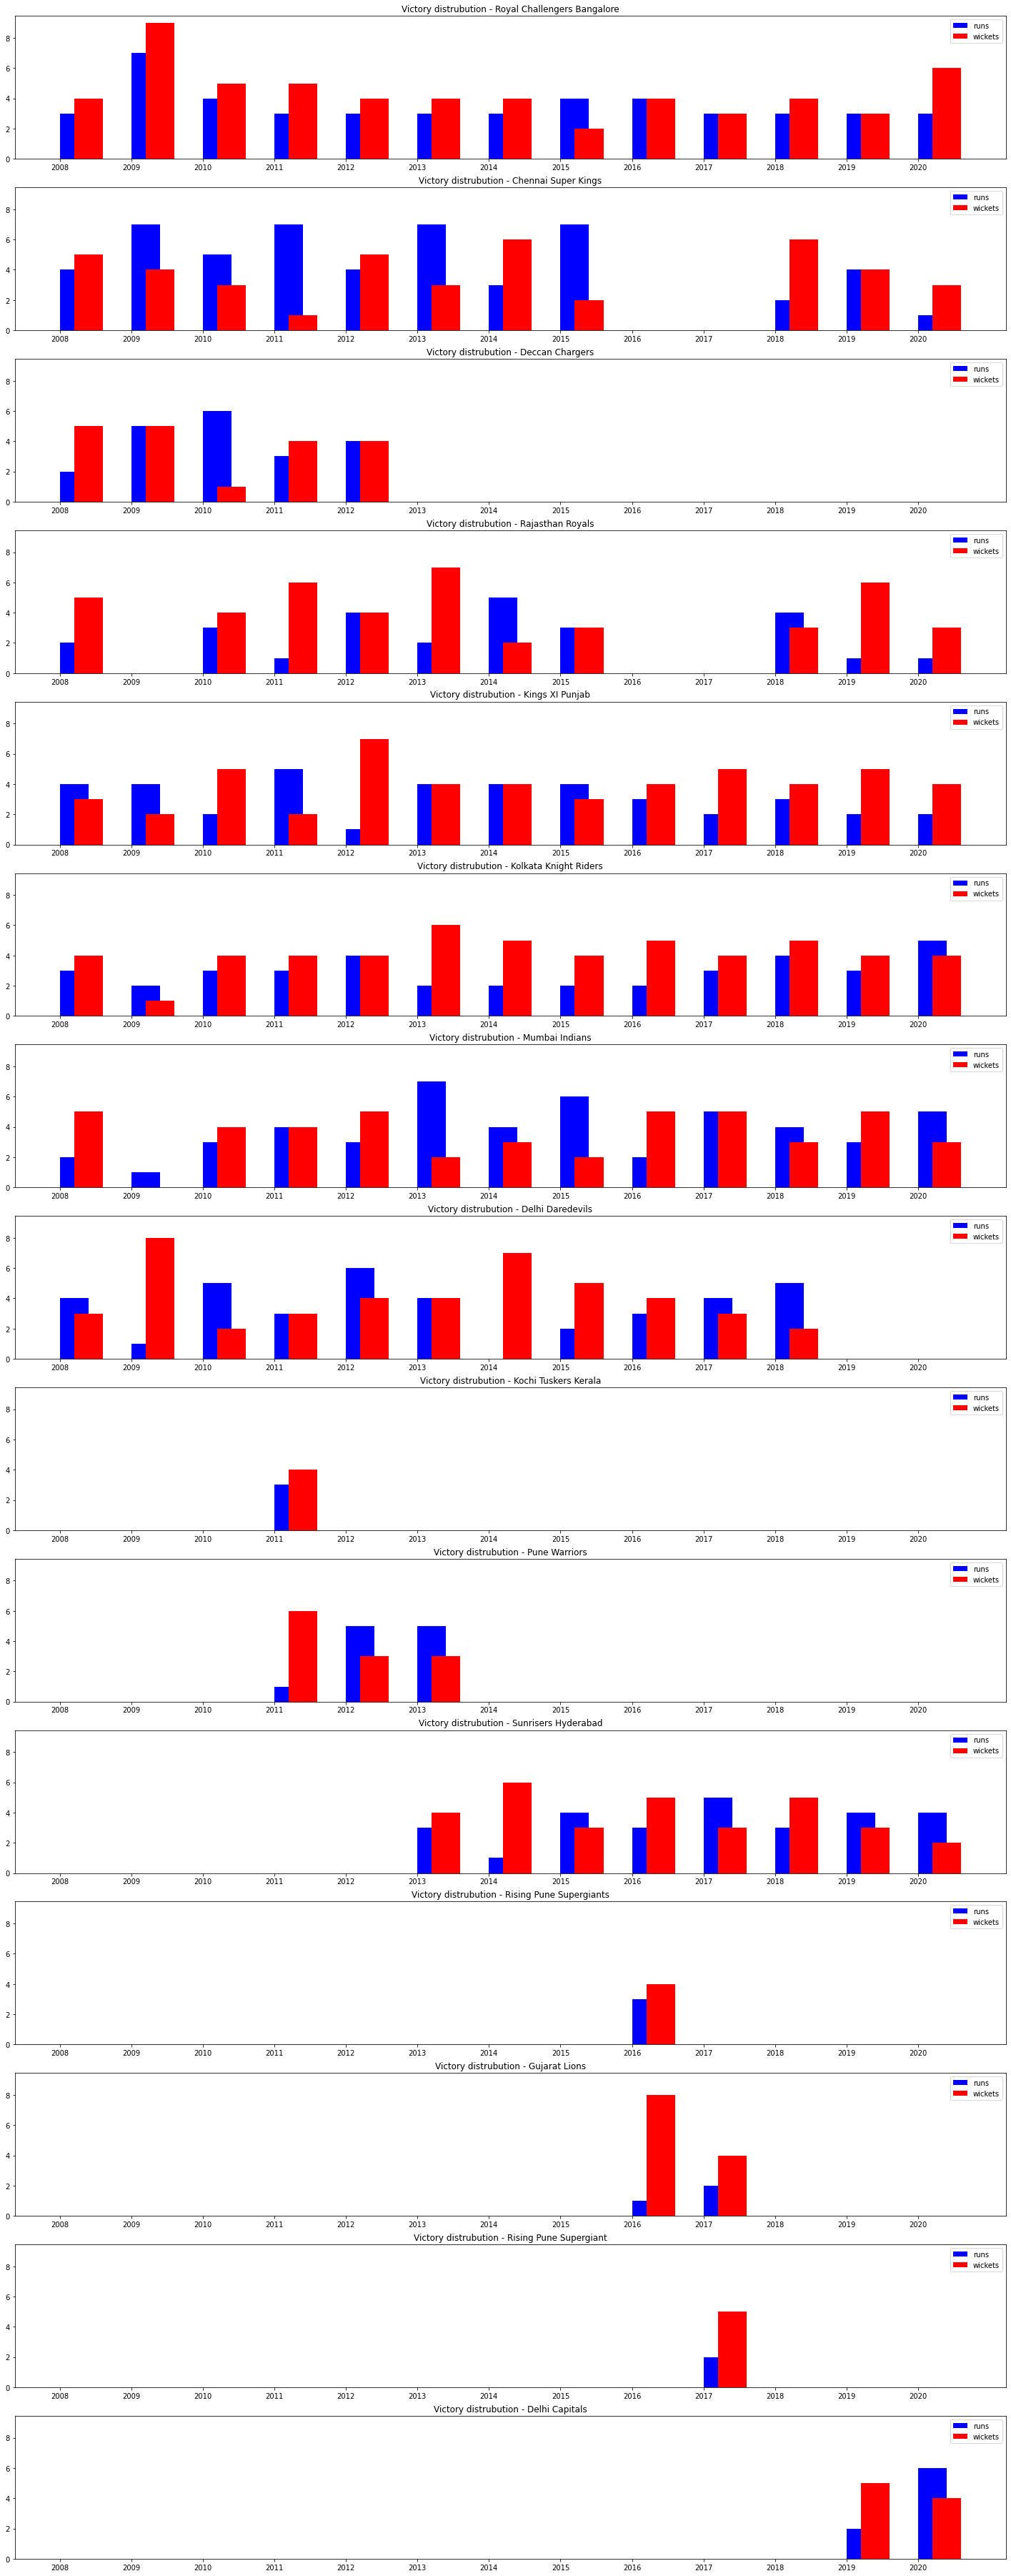

In [8]:



fig,axes = plt.subplots(data.team1.unique().shape[0],1,figsize = (20,50),sharex=True,sharey=True)
# fig.suptitle('Team wise winning distribution')
fig.tight_layout()
fig.subplots_adjust(hspace =.2)

for x,team in enumerate(data.team1.unique()):  
    data_team=data.loc[data.team1==team]
    runs=data_team[data_team.team1==data_team.winner]
    runs = data_team.loc[data_team.result=='runs']
    runs = runs.groupby(['date','team1']).size().reset_index(name='runs_count')
    wickets = data_team.loc[data_team.result=='wickets']
    wickets = wickets.groupby(['date','team1']).size().reset_index(name='wickets_count')
    axes[x].bar(runs['date'],runs['runs_count'],0.4,color='b',align='edge')
    axes[x].set_title(f"Victory distrubution - {team}")
    axes[x].bar(wickets['date']+0.2,wickets['wickets_count'],0.4,color='r',align='edge')
    axes[x].set_xticks(data.date.unique())
    axes[x].set_xticklabels(data.date.unique())
    axes[x].xaxis.set_tick_params(which='both', labelbottom=True)
    axes[x].legend(labels=['runs','wickets'],loc="upper right")


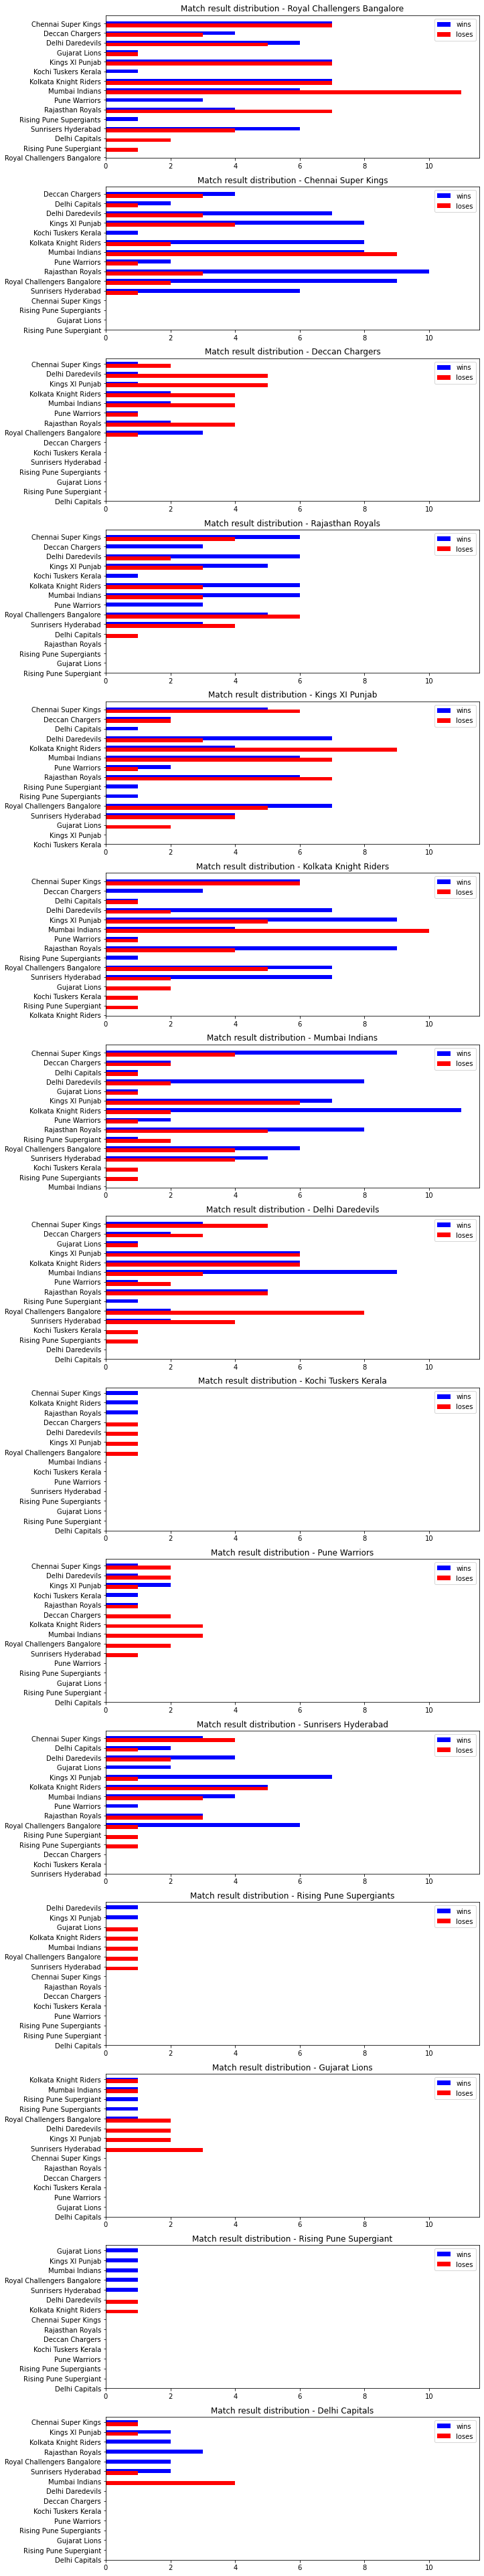

In [9]:
fig,axes = plt.subplots(data.team1.unique().shape[0],1,figsize = (10,70),sharex=True,sharey=False)


for x,team in enumerate(data.team1.unique()):  
    data_team=data.loc[data.team1==team]
    won =data_team[data_team.team1==data_team.winner]
    won = won.groupby(['team1','team2']).size().reset_index(name='win_count')
    loser = data_team[data_team.team1!=data_team.winner]
    loser = loser.groupby(['team1','team2']).size().reset_index(name='loser_count')
    axes[x].barh(won['team2'],won['win_count'],0.4,color='b',align='center')
    axes[x].set_title(f"Match result distribution - {team}")
    axes[x].barh(loser['team2'],loser['loser_count'],0.4,color='r',align='edge')
    axes[x].invert_yaxis()
#     win_list= list(won.team2.unique())
#     lose_list = list(loser.team2.unique())
#     axes[x].set_yticklabels(np.array(set(win_list+ lose_list)))
    axes[x].set_yticks(data.team2.unique())
    axes[x].set_yticklabels(data.team2.unique())
    axes[x].xaxis.set_tick_params(which='both', labelbottom=True)
    axes[x].legend(labels=['wins','loses'],loc="upper right")


In [10]:
detail = detail.merge(summary.loc[:,('id','date')],on='id',how='left')

In [11]:
#runs


detail_strike = detail.loc[:,('batting_team','bowling_team')].groupby(
    ['batting_team','bowling_team']).size().rename('ball_count').reset_index()

detail_bat_runs = detail.loc[:,('batting_team','bowling_team','batsman_runs')].groupby(
    ['batting_team','bowling_team'])['batsman_runs'].sum().reset_index(name='batsman_runs')

# detail_strike = detail_strike.merge(detail_bat_runs.loc[:,'batsman_runs'],on=detail_strike.index.values,how='left')
detail_strike = detail_strike.merge(detail_bat_runs.loc[:,'batsman_runs'],left_index=True, right_index=True,how='left')

detail_strike['strike_rate'] = (100*detail_strike['batsman_runs'])/detail_strike['ball_count']

detail_wick_lost = detail.loc[(detail.is_wicket==1)].groupby(
    ['batting_team','bowling_team','is_wicket'])['is_wicket'].sum().rename('wickets_lost').reset_index()

detail_strike = detail_strike.merge(detail_wick_lost.loc[:,'wickets_lost'],left_index=True, right_index=True,how='left')

# del detail_strike
# del detail_bat_runs
# del detail_wick_lost

# del detail_ball
# del detail_runs_c
# del detail_wick_taken

# Wickets

detail_ball = detail.loc[:,('batting_team','bowling_team')].groupby(
    ['bowling_team','batting_team']).size().rename('ball_bowled').reset_index()

detail_runs_c= detail.loc[:,('batting_team','bowling_team','batsman_runs')].groupby(
    ['bowling_team','batting_team'])['batsman_runs'].sum().reset_index(name='runs_conceded')

detail_ball= detail_ball.merge(detail_runs_c['runs_conceded'],left_index=True, right_index=True,how='left')

detail_wick_taken = detail.loc[(detail.is_wicket==1)].groupby(
    ['bowling_team','batting_team'])['is_wicket'].sum().reset_index(name='wickets_taken')

detail_ball= detail_ball.merge(detail_wick_taken.loc[:,('wickets_taken')], left_index=True,right_index=True,how='left')

detail_strike = detail_strike.merge(
    detail_ball.loc[:,('ball_bowled','runs_conceded','wickets_taken')],left_index=True,right_index=True,how='left')

detail_strike['rpw_ratio'] = (detail_strike['batsman_runs']/detail_strike['wickets_lost'])/(
    detail_strike['runs_conceded']/detail_strike['wickets_taken'])

detail_strike['nrr']= (detail_strike['batsman_runs']/(detail_strike['ball_count']/6)) - (
    detail_strike['runs_conceded']/(detail_strike['ball_bowled']/6))

detail_strike['rpw'] = (detail_strike['runs_conceded']/detail_strike['wickets_taken'])
detail_strike['eco_rate'] = detail_strike['runs_conceded']/(detail_strike['ball_bowled']/6)

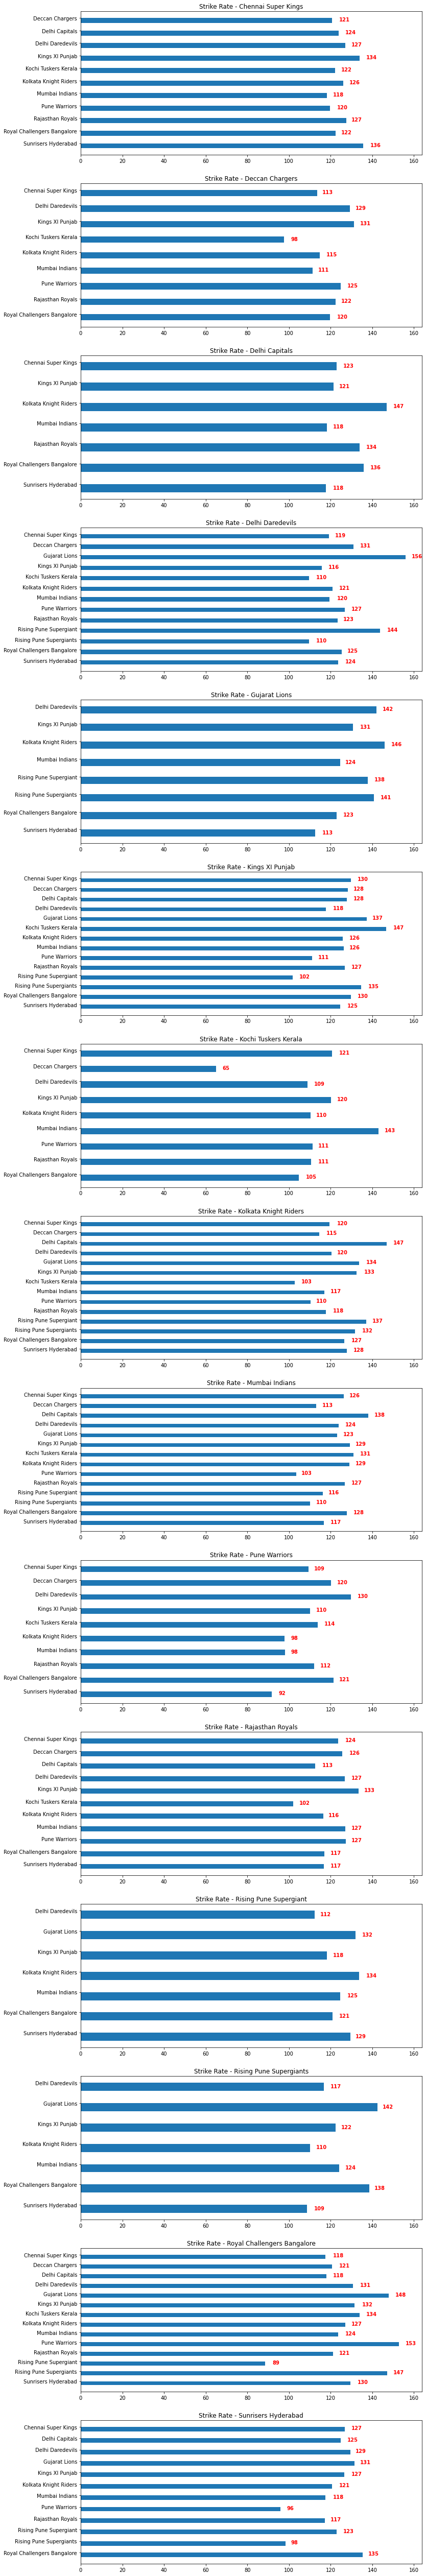

In [12]:
fig,axes = plt.subplots(detail_strike.batting_team.unique().shape[0],1,figsize = (10,70),sharex=True,sharey=False)
# fig.suptitle("Team wise Strike-Rate")
fig.tight_layout()
fig.subplots_adjust(hspace =.2)
for x, team in enumerate(detail_strike.batting_team.unique()): 
    team_strike=detail_strike.loc[detail_strike.batting_team==team]
    axes[x].barh(team_strike.bowling_team,team_strike.strike_rate,0.4,align='edge')
    axes[x].invert_yaxis()
    for i, s_r in enumerate(team_strike.strike_rate):
        axes[x].text(round(s_r + 3,0), i + .25, str(round(s_r)), color='red', fontweight='bold')
    axes[x].set_title(f"Strike Rate - {team}")
    axes[x].set_yticks(team_strike.bowling_team)
    axes[x].set_yticklabels(team_strike.bowling_team)
    axes[x].xaxis.set_tick_params(which='both', labelbottom=True)


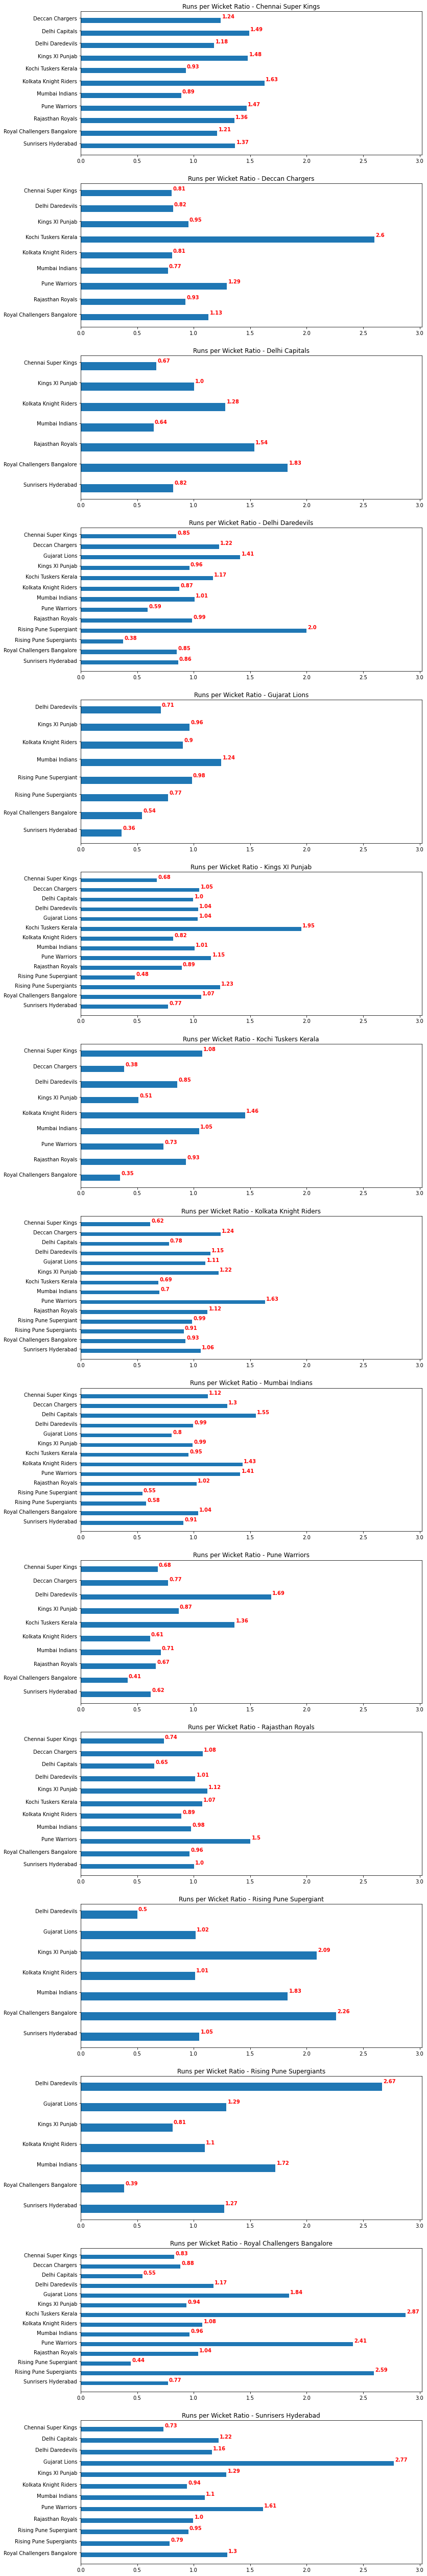

In [13]:
fig,axes = plt.subplots(detail_strike.batting_team.unique().shape[0],1,figsize = (10,70),sharex=True,sharey=False)
# fig.suptitle("Team wise Strike-Rate")
fig.tight_layout()
fig.subplots_adjust(hspace =.2)
for x, team in enumerate(detail_strike.batting_team.unique()): 
    team_strike=detail_strike.loc[detail_strike.batting_team==team]
    axes[x].barh(team_strike.bowling_team,team_strike.rpw_ratio,0.4,align='edge')
    axes[x].invert_yaxis()
    for i, rpw in enumerate(team_strike.rpw_ratio):
        axes[x].text(rpw + 0.01, i+0.01, str(round(rpw,2)), color='red', fontweight='bold')
    axes[x].set_title(f"Runs per Wicket Ratio - {team}")
    axes[x].set_yticks(team_strike.bowling_team)
    axes[x].set_yticklabels(team_strike.bowling_team)
    axes[x].xaxis.set_tick_params(which='both', labelbottom=True)

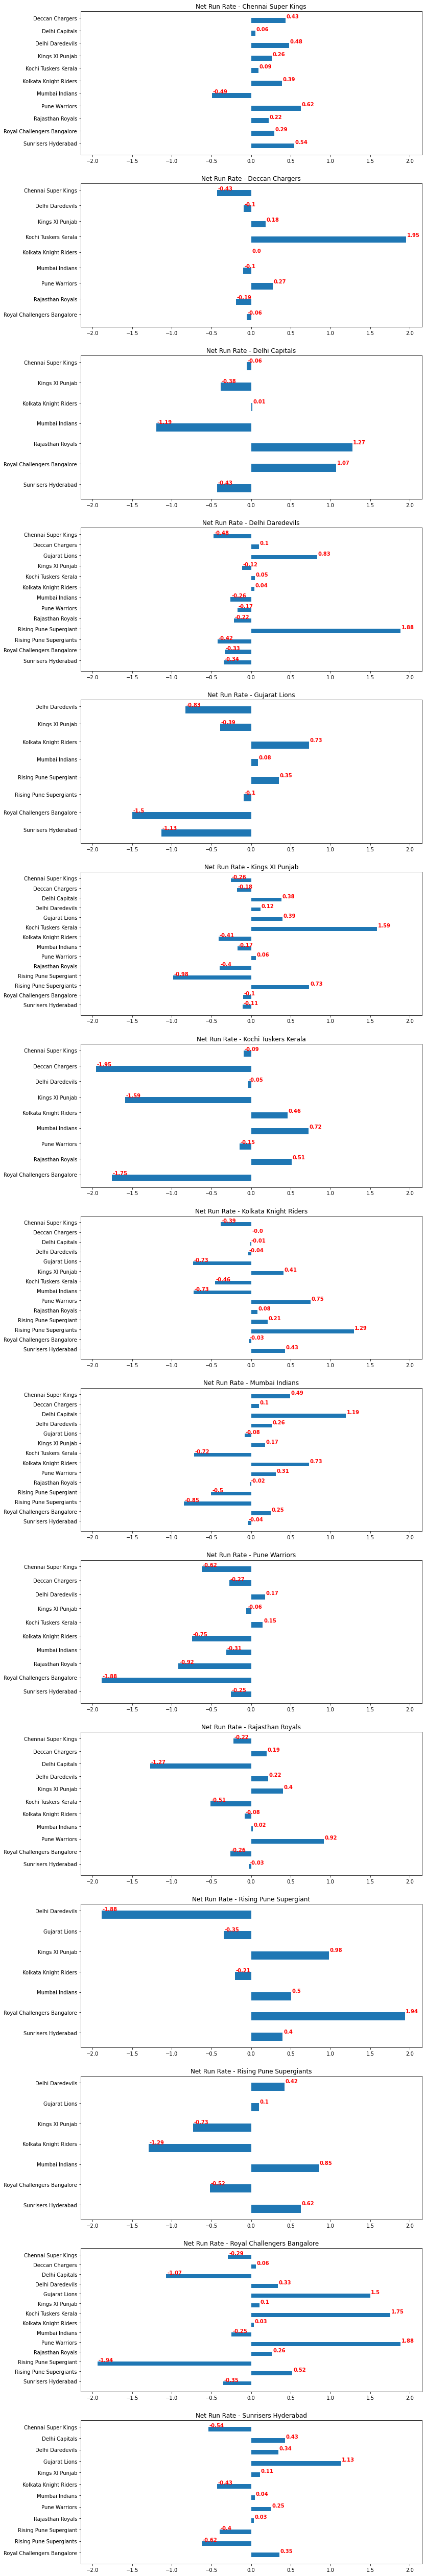

In [14]:
fig,axes = plt.subplots(detail_strike.batting_team.unique().shape[0],1,figsize = (10,70),sharex=True,sharey=False)
# fig.suptitle("Team wise Strike-Rate")
fig.tight_layout()
fig.subplots_adjust(hspace =.2)
for x, team in enumerate(detail_strike.batting_team.unique()): 
    team_strike=detail_strike.loc[detail_strike.batting_team==team]
    axes[x].barh(team_strike.bowling_team,team_strike.nrr,0.4,align='edge')
    axes[x].invert_yaxis()
    for i, nrr in enumerate(team_strike.nrr):
        axes[x].text(nrr + 0.01, i+0.01, str(round(nrr,2)), color='red', fontweight='bold')
    axes[x].set_title(f"Net Run Rate - {team}")
    axes[x].set_yticks(team_strike.bowling_team)
    axes[x].set_yticklabels(team_strike.bowling_team)
    axes[x].xaxis.set_tick_params(which='both', labelbottom=True)

In [15]:
maiden_overs = detail.loc[:,('bowling_team','batting_team','over','batsman_runs')].groupby(
    ['bowling_team','batting_team','over'])['batsman_runs'].sum().reset_index(name='runs')
maiden_overs.loc[maiden_overs.runs==0]

,bowling_team,batting_team,over,runs
280,Deccan Chargers,Kochi Tuskers Kerala,0,0
281,Deccan Chargers,Kochi Tuskers Kerala,1,0
296,Deccan Chargers,Kochi Tuskers Kerala,16,0
1262,Kochi Tuskers Kerala,Deccan Chargers,6,0
3149,Sunrisers Hyderabad,Rising Pune Supergiants,0,0


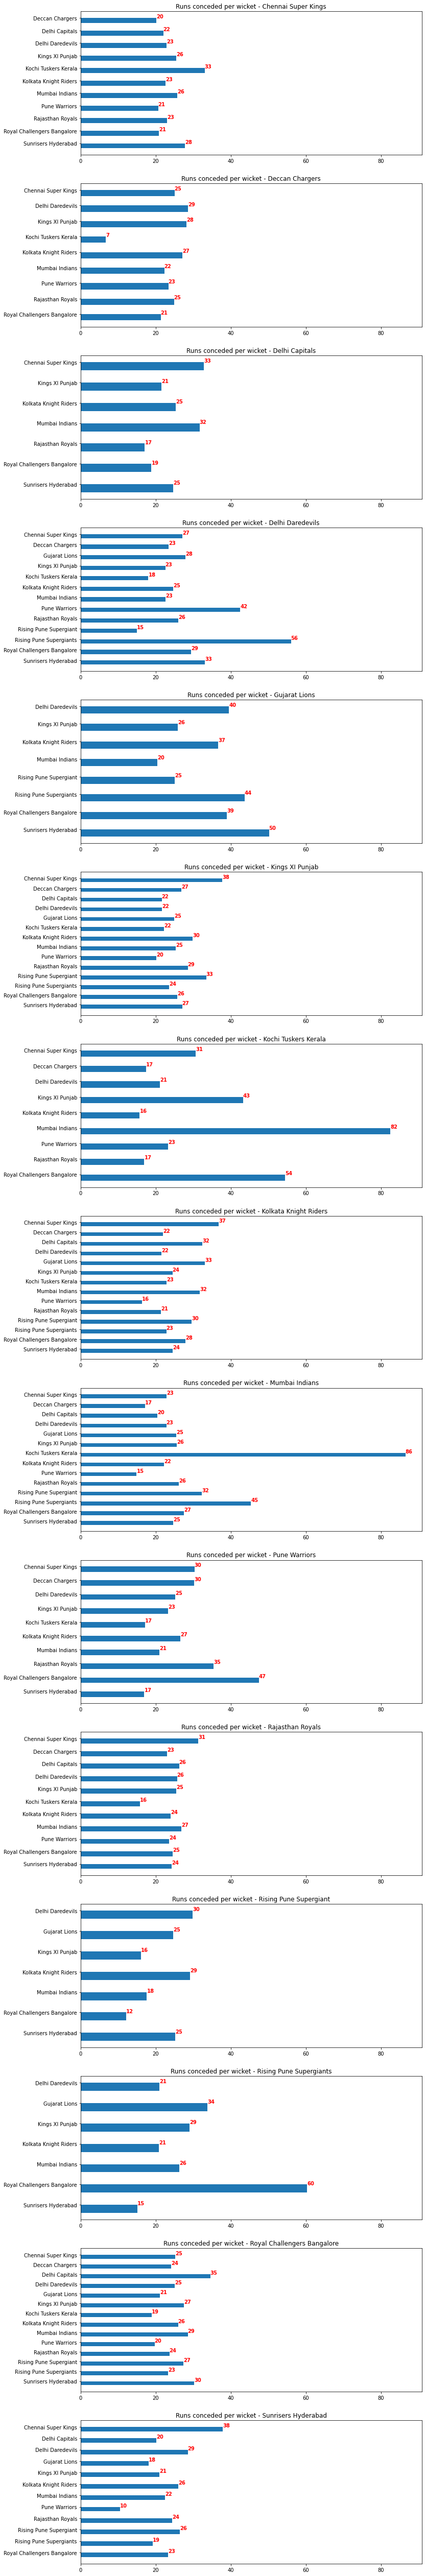

In [16]:
fig,axes = plt.subplots(detail_strike.batting_team.unique().shape[0],1,figsize = (10,70),sharex=True,sharey=False)
# fig.suptitle("Team wise Strike-Rate")
fig.tight_layout()
fig.subplots_adjust(hspace =.2)
for x, team in enumerate(detail_strike.batting_team.unique()): 
    team_strike=detail_strike.loc[detail_strike.batting_team==team]
    axes[x].barh(team_strike.bowling_team,team_strike.rpw,0.4,align='edge')
    axes[x].invert_yaxis()
    for i, rpw in enumerate(team_strike.rpw):
        axes[x].text(rpw + 0.01, i+0.01, str(round(rpw)), color='red', fontweight='bold')
    axes[x].set_title(f"Runs conceded per wicket - {team}")
    axes[x].set_yticks(team_strike.bowling_team)
    axes[x].set_yticklabels(team_strike.bowling_team)
    axes[x].xaxis.set_tick_params(which='both', labelbottom=True)

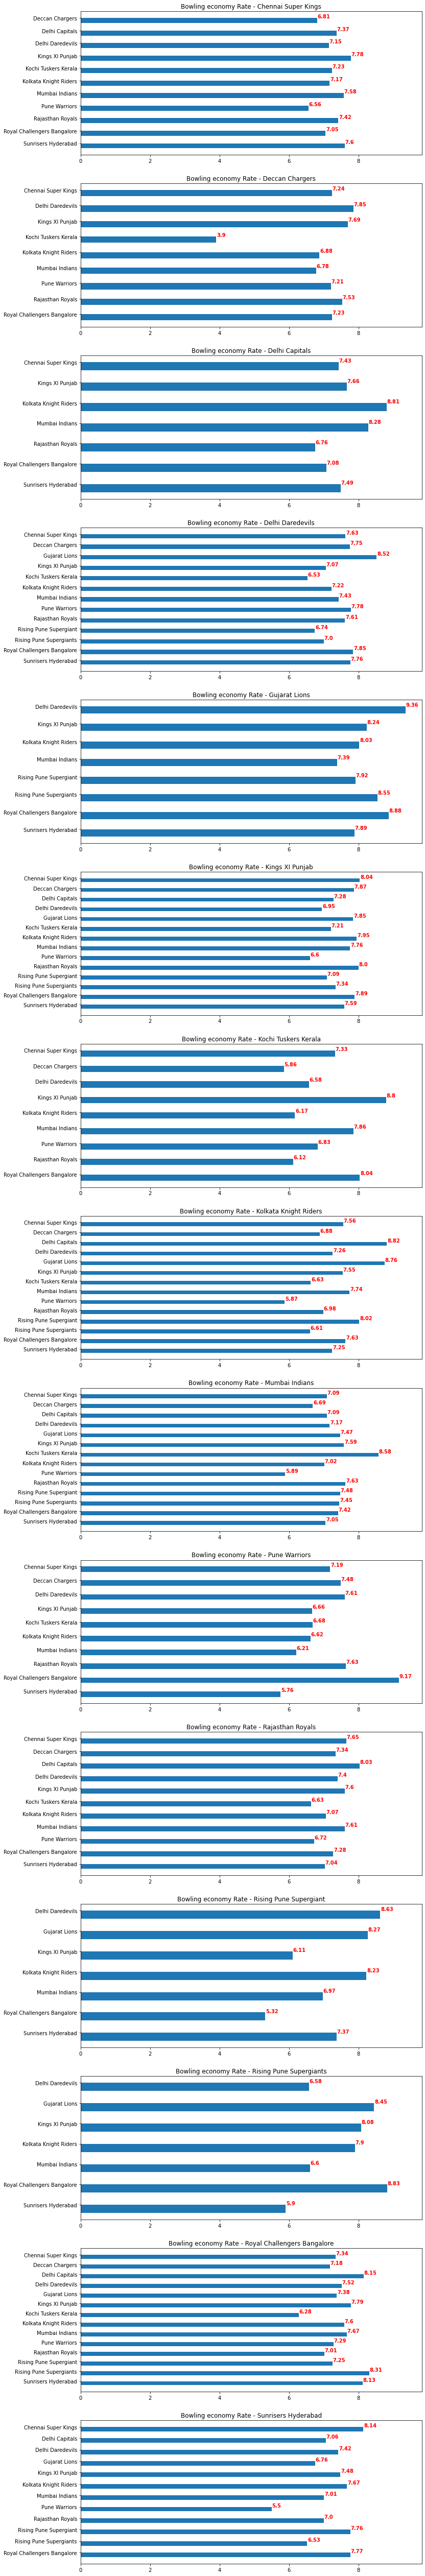

In [17]:
fig,axes = plt.subplots(detail_strike.batting_team.unique().shape[0],1,figsize = (10,70),sharex=True,sharey=False)
# fig.suptitle("Team wise Strike-Rate")
fig.tight_layout()
fig.subplots_adjust(hspace =.2)
for x, team in enumerate(detail_strike.batting_team.unique()): 
    team_strike=detail_strike.loc[detail_strike.batting_team==team]
    axes[x].barh(team_strike.bowling_team,team_strike.eco_rate,0.4,align='edge')
    axes[x].invert_yaxis()
    for i, ecr in enumerate(team_strike.eco_rate):
        axes[x].text(ecr + 0.01, i+0.01, str(round(ecr,2)), color='red', fontweight='bold')
    axes[x].set_title(f"Bowling economy Rate - {team}")
    axes[x].set_yticks(team_strike.bowling_team)
    axes[x].set_yticklabels(team_strike.bowling_team)
    axes[x].xaxis.set_tick_params(which='both', labelbottom=True)

In [18]:
#variables and thier memory
import pandas as pd
import sys
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']
temp = sorted([(x, sys.getsizeof(globals().get(x))/(1024*1024))
        for x in dir() 
        if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)
df_temp = pd.DataFrame(temp, columns = ['variable', 'size_in_MB'])
df_temp.head()

,variable,size_in_MB
0,detail,105.407610
1,summary,0.701382
2,maiden_overs,0.504272
3,data,0.236062
4,detail_strike,0.036425


In [19]:
# Delete files and folders created

import os 
ind = os.listdir(os.getcwd()).index('assignment')
for file in os.listdir(os.listdir(os.getcwd())[ind]):
    os.remove((os.path.join(os.listdir(os.getcwd())[ind],file)))
os.rmdir(os.getcwd()+'/'+os.listdir(os.getcwd())[ind])

In [20]:
#Deleting all variables created
for x in dir():
    if not x.startswith('_') and x not in sys.modules and x not in ipython_vars:
        del globals()[x]
[x for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars]

[]

## Future Predictions

Predicting the outcome of winner - 
The distribution of wins and losses is skewed and is also dependednt on the opponent.
Each of the batting statistics, i.e. Strike Rate, Runs per Wicket Ratio, Runs conceded per wicket Ratio and Net Run Rate are all again skewed and dependendent on opponent team. 
The bowling statistics; Runs conceded per wicket, Economy Rate, Maiden overs of which they are none, too show same skewness as per the opponent team.

All the above statistics have been analyzed without taking cognisance of time period since visualizing a third dimension would have been voluminous.

Predicting the outcome of any match would be driven by calculating conditional probablities of all the above statistics and then using Bayesian method to estimate the future probablities and thereby the outcome of the match. 
